In [2]:
import pandas as pd

df = pd.read_csv("../reports/cv_summary/grid_search_results.csv")


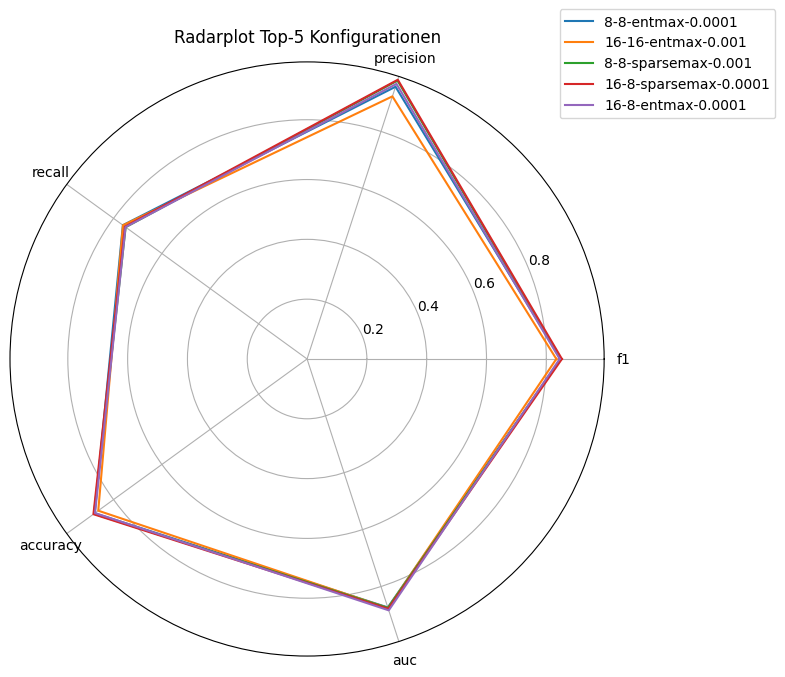

In [4]:
from matplotlib import pyplot as plt
import numpy as np

def plot_radar_top_n(df, metrics, top_n=5):
    from math import pi

    top_df = df.sort_values("avg_cost").head(top_n)
    categories = metrics
    N = len(categories)

    # Winkel für Radarachsen
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # schließen

    plt.figure(figsize=(8, 8))
    for idx, (_, row) in enumerate(top_df.iterrows()):
        values = [row[m] for m in categories]
        values += values[:1]
        label = f"{row['n_d']}-{row['n_a']}-{row['mask_type']}-{row['lambda_sparse']}"
        plt.polar(angles, values, label=label)
    plt.xticks(angles[:-1], categories)
    plt.title(f"Radarplot Top-{top_n} Konfigurationen")
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

plot_radar_top_n(df, metrics=["f1", "precision", "recall", "accuracy", "auc"], top_n=5)


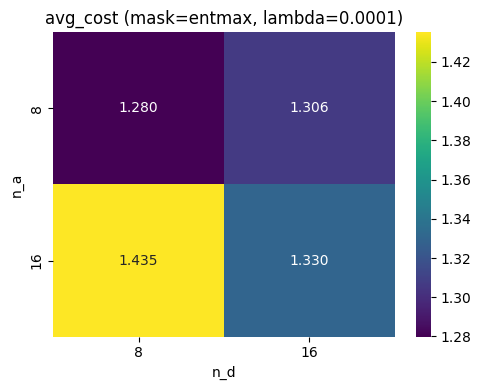

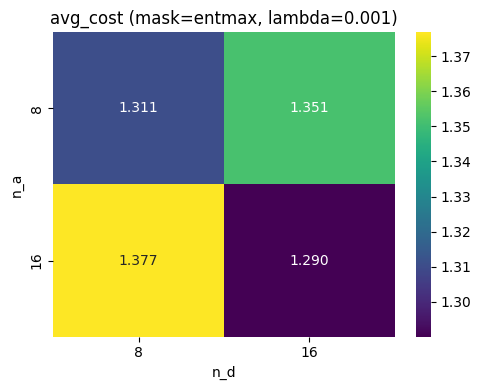

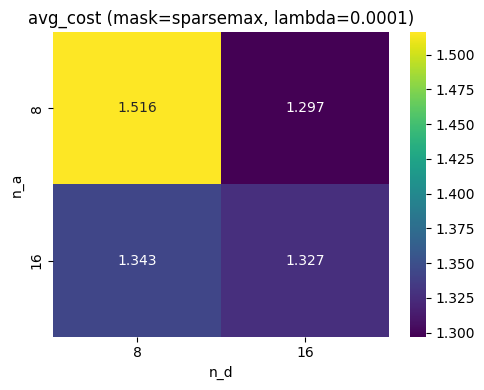

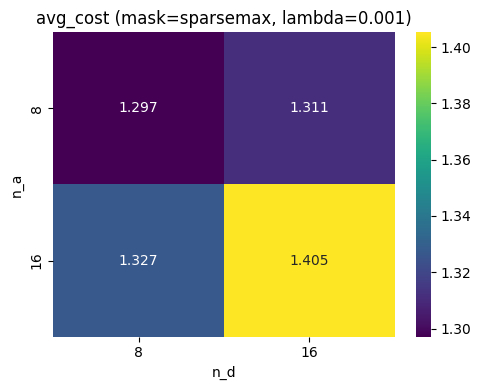

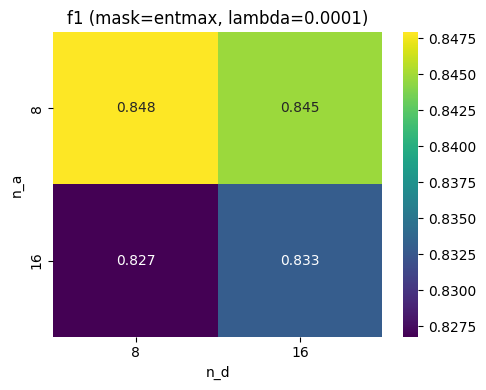

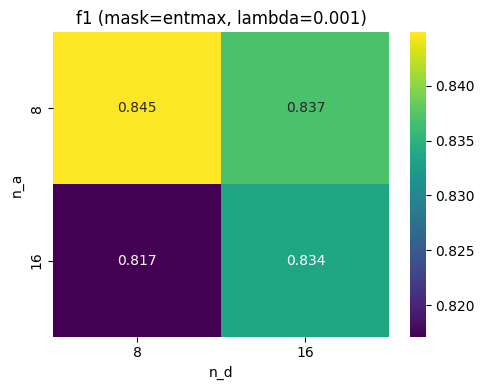

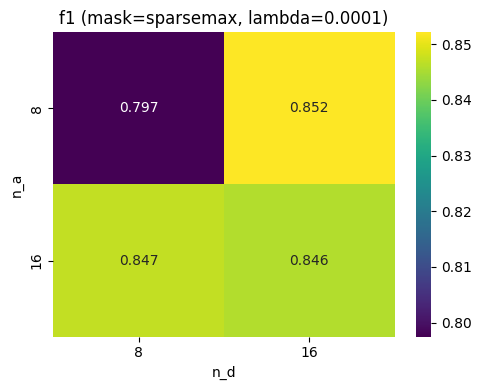

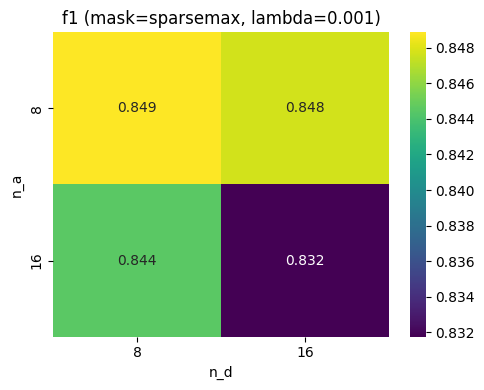

In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps(df, metric="avg_cost"):
    for mask in df["mask_type"].unique():
        for lam in sorted(df["lambda_sparse"].unique()):
            sub = df[(df["mask_type"] == mask) & (df["lambda_sparse"] == lam)]
            pivot = sub.pivot(index="n_a", columns="n_d", values=metric)
            if pivot.empty or pivot.isnull().values.any():
                continue
            plt.figure(figsize=(5, 4))
            sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis")
            plt.title(f"{metric} (mask={mask}, lambda={lam})")
            plt.tight_layout()
            plt.show()

plot_heatmaps(df, metric="avg_cost")
plot_heatmaps(df, metric="f1")

In [6]:
import plotly.express as px

def plot_interactive_scatter(df, metric="avg_cost"):
    fig = px.scatter_3d(
        df,
        x="n_d",
        y="n_a",
        z=metric,
        color="mask_type",
        symbol="lambda_sparse",
        hover_data=["f1", "recall", "accuracy"]
    )
    fig.update_layout(title=f"3D Scatterplot (metric = {metric})")
    fig.show()

plot_interactive_scatter(df, metric="avg_cost")

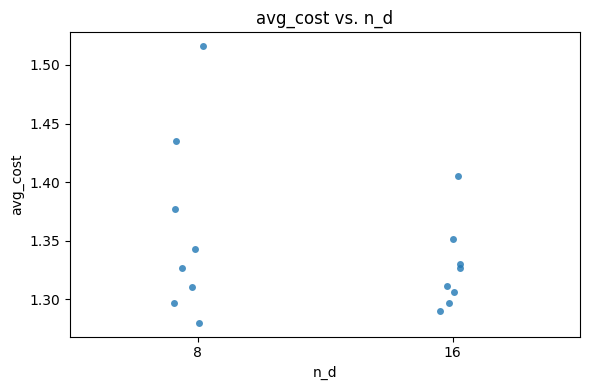

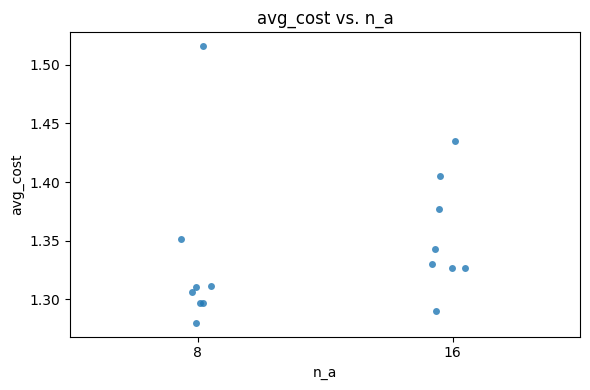

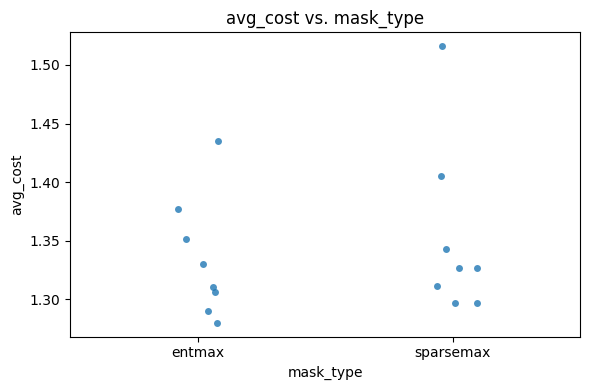

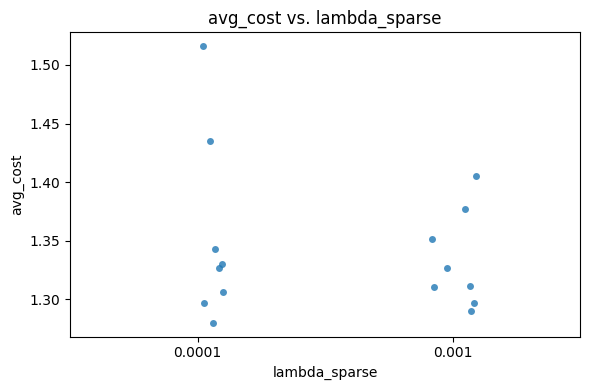

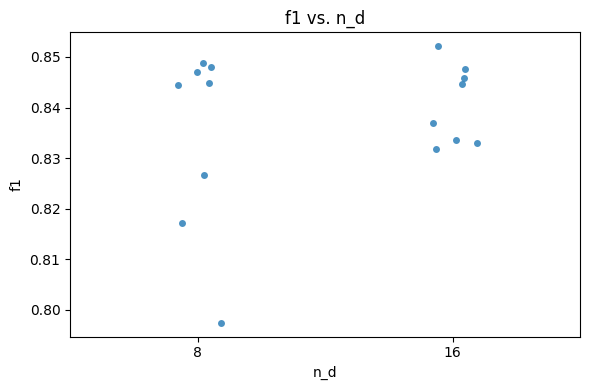

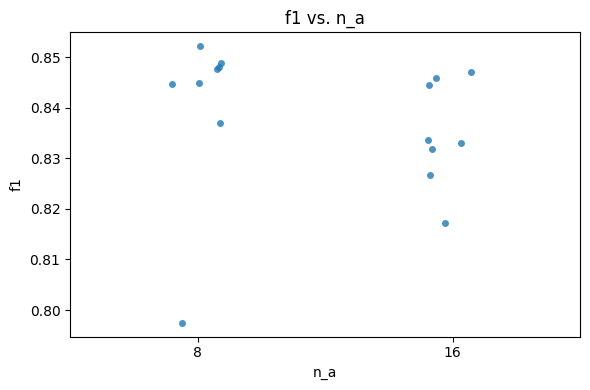

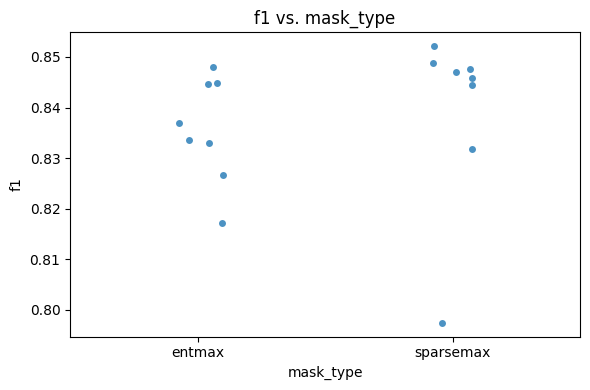

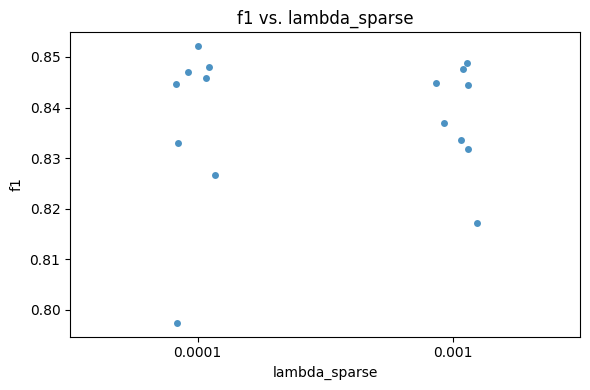

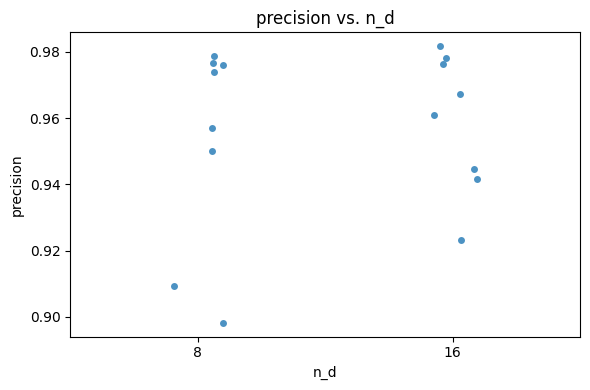

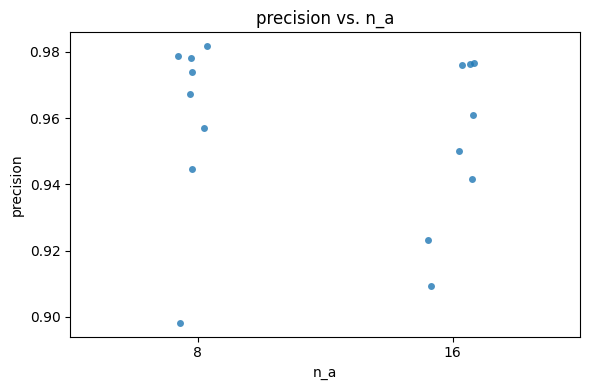

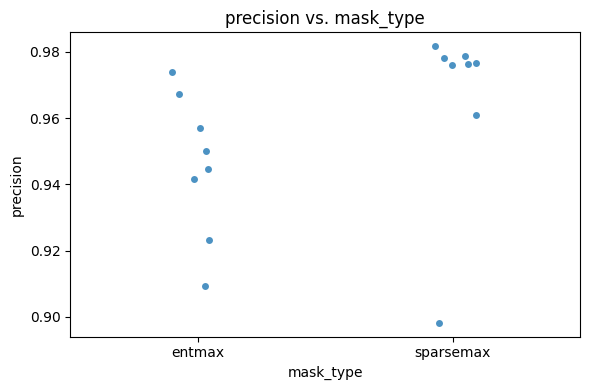

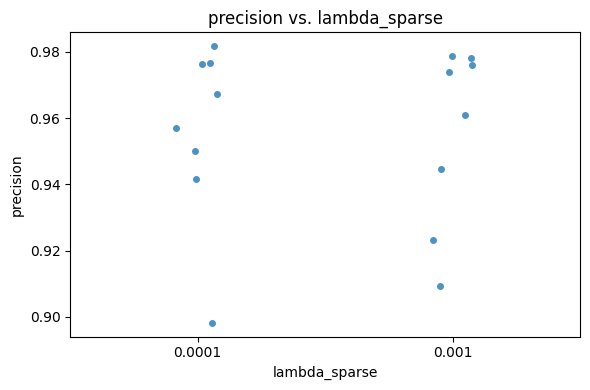

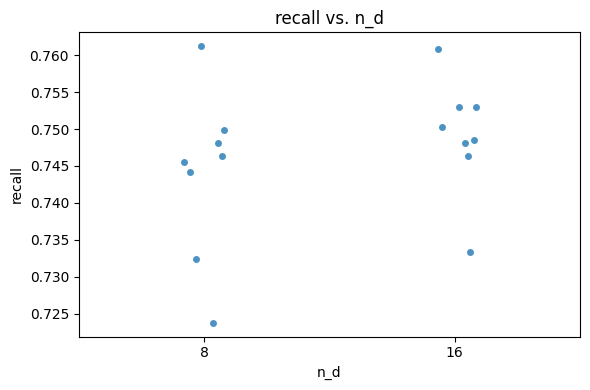

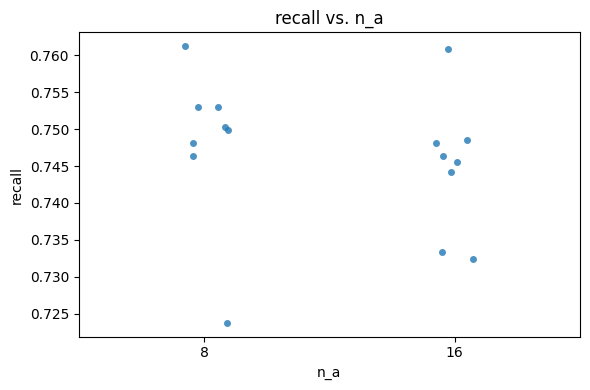

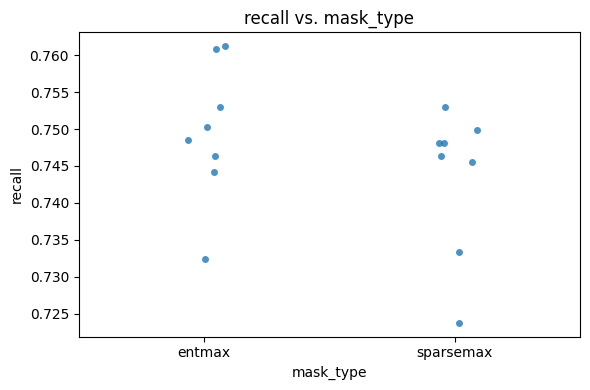

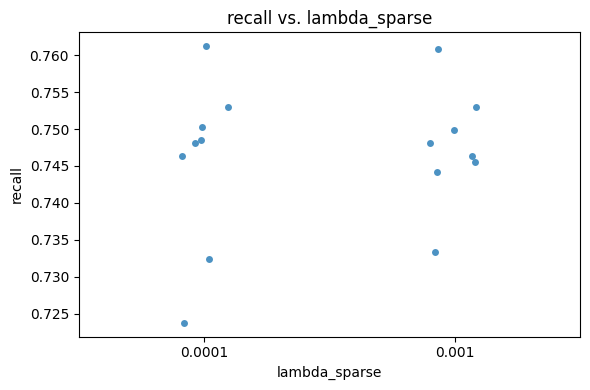

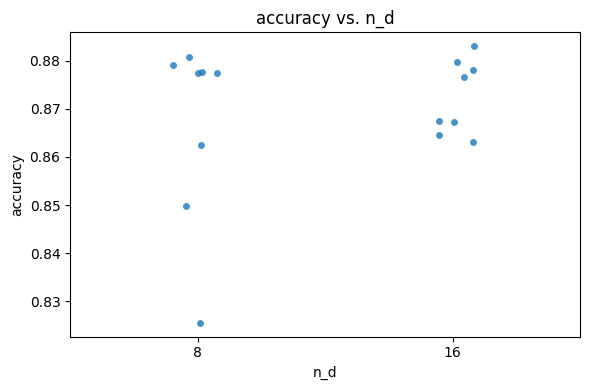

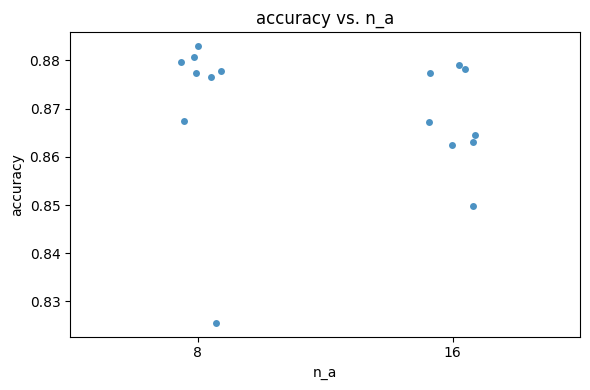

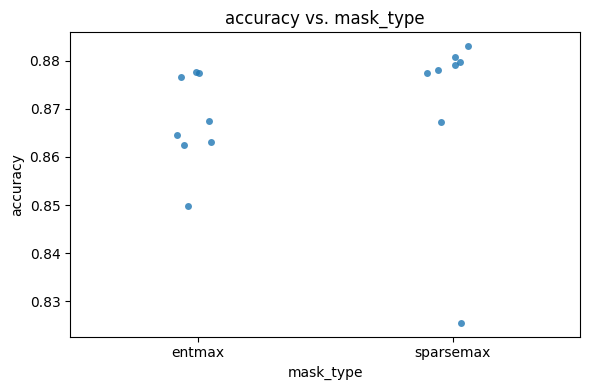

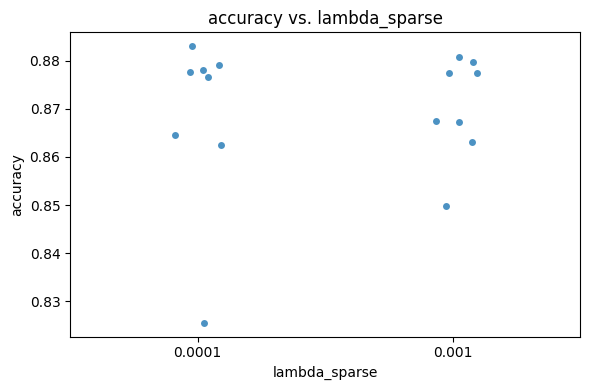

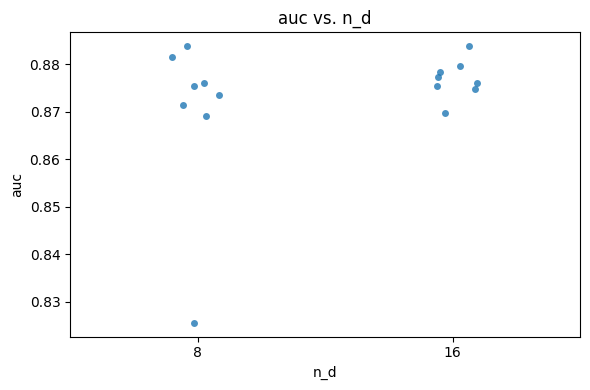

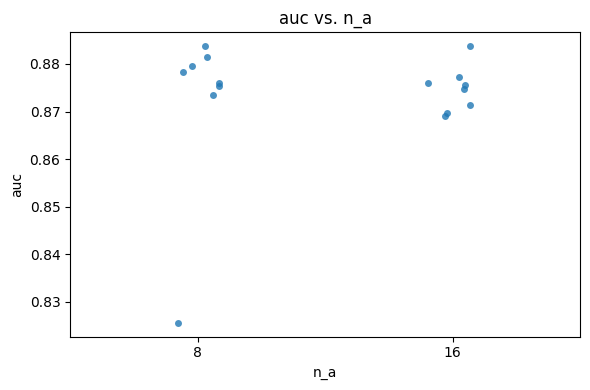

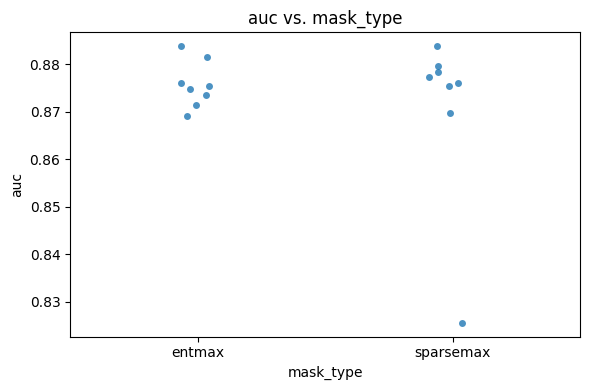

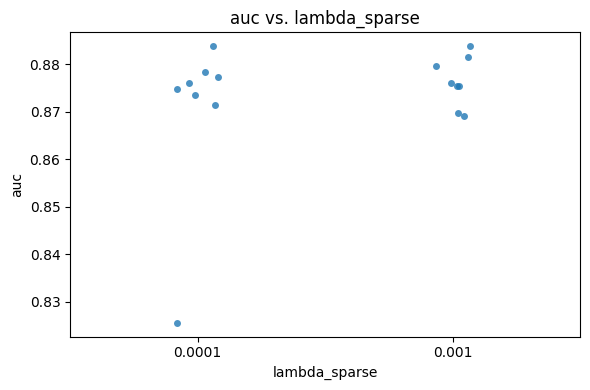

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_metric_vs_hyperparams(df, metrics):
    hp_cols = ["n_d", "n_a", "mask_type", "lambda_sparse"]

    for metric in metrics:
        for hp in hp_cols:
            plt.figure(figsize=(6, 4))
            sns.stripplot(x=hp, y=metric, data=df, jitter=True, alpha=0.8)
            plt.title(f"{metric} vs. {hp}")
            plt.tight_layout()
            plt.show()

plot_metric_vs_hyperparams(
    df,
    metrics=["avg_cost", "f1", "precision", "recall", "accuracy", "auc"]
)


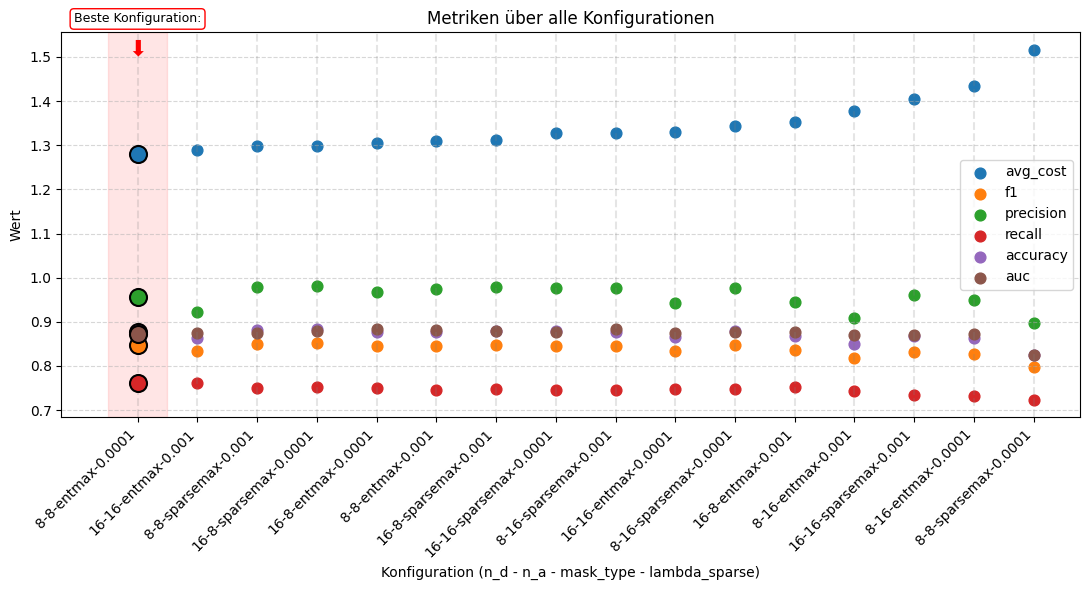

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os

def plot_final_metric_matrix(
    df,
    metrics,
    highlight_metric="avg_cost"
):

    df = df.copy()
    df["config_label"] = df.apply(
        lambda r: f"{r['n_d']}-{r['n_a']}-{r['mask_type']}-{r['lambda_sparse']}", axis=1
    )

    x = list(range(len(df)))
    labels = df["config_label"].tolist()

    # Beste Konfiguration für Zielmetrik
    best_idx = df[highlight_metric].idxmin()
    best_x = x[best_idx]

    plt.figure(figsize=(len(df) * 0.5 + 3, 6))

    for metric in metrics:
        plt.scatter(x, df[metric], label=metric, s=60)

    # Vertikale Gridlines
    for xi in x:
        plt.axvline(x=xi, color="gray", linestyle="--", alpha=0.2)

    # Highlight der besten Konfiguration
    plt.axvspan(best_x - 0.5, best_x + 0.5, color="red", alpha=0.1)

    for metric in metrics:
        plt.scatter(best_x, df.loc[best_idx, metric], 
                    s=150, edgecolors='black', linewidths=1.5, 
                    color=plt.rcParams['axes.prop_cycle'].by_key()['color'][metrics.index(metric)],
                    zorder=5)
        
    plt.annotate("⬇", (best_x, plt.ylim()[1] * 0.99), 
             ha="center", va="top", fontsize=16, color="red")
    
    plt.text(
        best_x, plt.ylim()[1] * 1.01,
        f"Beste Konfiguration:",
        ha="center", va="bottom", fontsize=9,
        bbox=dict(facecolor="white", edgecolor="red", boxstyle="round,pad=0.3")
    )

    plt.xticks(x, labels, rotation=45, ha="right")
    plt.xlabel("Konfiguration (n_d - n_a - mask_type - lambda_sparse)")
    plt.ylabel("Wert")
    plt.title("Metriken über alle Konfigurationen")
    plt.grid(True, axis="y", linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_final_metric_matrix(
    df,
    metrics=["avg_cost", "f1", "precision", "recall", "accuracy", "auc"],
    highlight_metric="avg_cost"  # oder z. B. "f1"
)

